In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='ticks', context='talk')
%matplotlib inline

In [2]:
data=pd.read_csv(r'J:\Geology\WSGS\Projects\Critical Minerals\hu_12_formations_points.csv')

C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (69) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.HUC_12.head()


0    100700060901
1    100700060901
2    100700060901
3    100700060901
4    100700060511
Name: HUC_12, dtype: int64

In [4]:
X = data.iloc[0:, 0:51].values

In [6]:
from sklearn.preprocessing import Binarizer
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()

#y = data.iloc[0:,82:].values #train data for multilabel problem
y = data.HUC_12
lb.fit(y)
y_transformed=lb.transform(y)
#ybinarized = Binarizer().fit_transform(y)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.1, random_state=52)

In [8]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


In [9]:
#multi class learner predicting on HUC_12 to classify location based on geochemistry
scores0=[]
for i in range(1,50):
    clf=ExtraTreesClassifier(n_estimators=i, criterion='entropy', max_features=51, n_jobs=-1)
    models = clf.fit(X_train, y_train.astype(int))
    preds=models.predict(X_test)
    scores0.append(accuracy_score(y_test.astype(int), preds, normalize=True))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
scores1=[]

for i in range(1,50):
    clf=RandomForestClassifier(n_estimators=i, criterion='entropy', max_features=51, n_jobs=-1)
    models = clf.fit(X_train, y_train.astype(int))
    preds=models.predict(X_test)
    scores1.append(accuracy_score(y_test.astype(int), preds, normalize=True))

In [ ]:
plt.plot([scores0, scores1])

In [11]:
#clf=KNeighborsClassifier(n_neighbors=i, weights='uniform')
#clf=ExtraTreesClassifier(n_estimators=i, max_features=30)

scores=[]
for i in range(1,20,5):
    clf=ExtraTreesClassifier(n_estimators=i, max_features=30)
    models = clf.fit(X_train, y_train.astype(int))
    preds=models.predict(X_test)
    scores.append(accuracy_score(y_test.astype(int), preds, normalize=True))
    

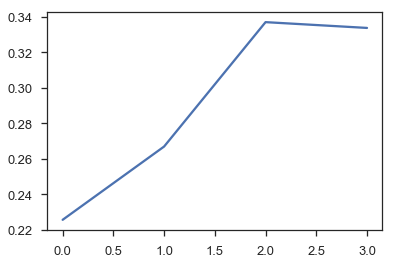

In [12]:
plt.plot(scores[0:30])

In [26]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
n_classes = y_train.shape[1]

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        preds[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], preds[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    preds.ravel())
average_precision["micro"] = average_precision_score(y_test, preds,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\ranking.py:444: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


Average precision score, micro-averaged over all classes: 0.68


Text(0.5,1,'Average precision score, micro-averaged over all classes: AP=0.68')

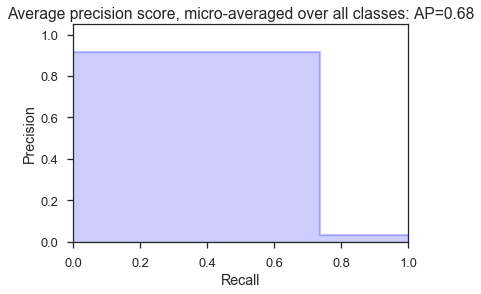

In [19]:
plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test.astype(int), preds, normalize=True)

0.3336950623982637

In [146]:
from sklearn.model_selection import GridSearchCV

In [157]:
etc=ExtraTreesClassifier()
parameters={'n_estimators':[1,5,10,15,20,25,30,35,40,45,50], 'max_features':[1,5,10,15,20,25,30,35,45,50]}

In [158]:
clf=GridSearchCV(etc, parameters)

In [159]:
clf

GridSearchCV(cv=None, error_score='raise',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50], 'max_features': [1, 5, 10, 15, 20, 25, 30, 35, 45, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [160]:
tuned=clf.fit(X_train, y_train.astype(int))

In [161]:
tuned_predictions=tuned.predict(X_test)

In [164]:
accuracy_score(y_test.astype(int), tuned_predictions, normalized=False)

1038

In [172]:
tuned.results()

AttributeError: 'GridSearchCV' object has no attribute 'results'

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LSTM
from keras.layers import Convolution2D, MaxPooling2D


C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [158]:
nn=Sequential()
nn.add(Dense(1000, activation='relu', input_shape=(53,)))
nn.add(Dropout(0.3))
nn.add(Dense(208, activation='sigmoid'))
nn.add(Dropout(0.2))
nn.add(Dense(208, activation='sigmoid'))
nn.add(Dropout(0.1))
nn.add(Dense(208, activation='sigmoid'))
nn.add(Dropout(0.3))


In [159]:
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['categorical_accuracy'])

In [160]:
history=nn.fit(X_train, y_train, epochs=20, batch_size=100, validation_split=0.2, validation_data=(X_test, y_test), shuffle=True,
              verbose=0)

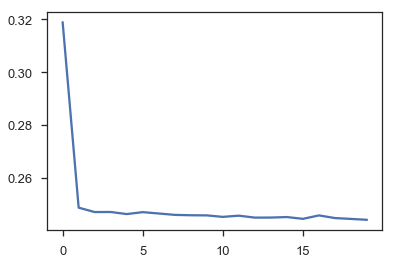

In [161]:
plt.plot(history.history['loss'])

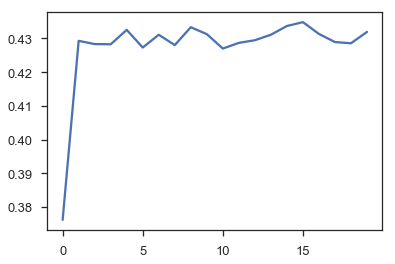

In [162]:
plt.plot(history.history['categorical_accuracy'])

In [163]:
neural=nn.predict(X_test)


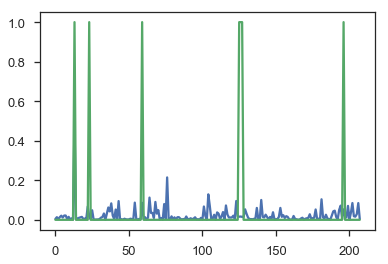

In [164]:
nbin = Binarizer(threshold=0.05).fit_transform(neural)
plt.plot(neural[1000])
plt.plot(y_test[1000])
predictions=neural

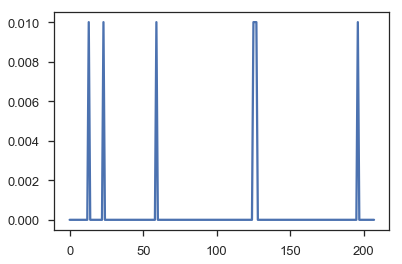

In [155]:
plt.plot(y_test[1000]/100)

In [89]:
from skmultilearn.adapt import MLkNN

classifier = MLkNN(k=30)

# train
classifier.fit(X_train, y_train)

# predict
predictions = np.asarray(classifier.predict(X_test).todense())


In [156]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
n_classes = y_train.shape[1]

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[i,:],
                                                        predictions[i,:])
    average_precision[i] = average_precision_score(y_test[i,:], predictions[i,:])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    predictions.ravel())
average_precision["micro"] = average_precision_score(y_test, predictions,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.24


Text(0.5,1,'Average precision score, micro-averaged over all classes: AP=0.24')

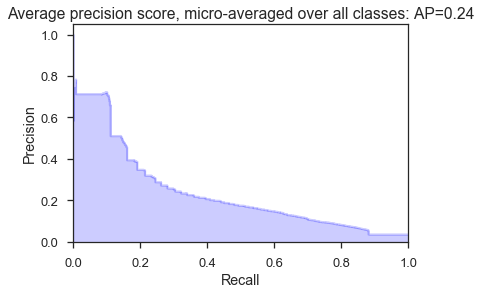

In [157]:
plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

In [140]:
X_test[0]

array([ 2.600000e+00,  3.890000e+00,  4.000000e+00,  4.222000e+00,
        2.100000e+01,  0.000000e+00,  1.800000e+01,  6.970000e+02,
        2.000000e+00,  3.000000e+00,  2.572000e+00,  0.000000e+00,
        5.700000e+01,  1.020000e+02,  5.800000e+00,  5.000000e+01,
        1.000000e+00,  1.100000e+01,  3.000000e+00,  1.300000e+00,
        1.480000e+00,  7.700000e+00,  1.632000e+00,  2.300000e+01,
        2.400000e+01,  3.000000e-01,  1.911000e+00,  3.960000e+02,
        0.000000e+00,  7.030000e-01,  0.000000e+00,  4.100000e+01,
        1.172000e+03,  1.400000e+01,  2.000000e+00,  0.000000e+00,
        4.900000e+00,  8.000000e-01,  4.500000e+00,  2.000000e+00,
        2.070000e+02,  0.000000e+00,  0.000000e+00,  8.500000e+00,
        2.261000e+03,  4.800000e+01,  1.300000e+01,  1.100000e+01,
        3.200000e+00,  5.100000e+01,  1.390000e+02, -1.091186e+02,
        4.479530e+01])

In [141]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0.])

In [142]:
neural[0]

array([0.        , 0.03928947, 0.00882252, 0.02093136, 0.01938877,
       0.01047243, 0.02670877, 0.04562639, 0.        , 0.04556761,
       0.01238476, 0.        , 0.        , 0.60112214, 0.07495687,
       0.05106299, 0.02121359, 0.01988398, 0.02237252, 0.02825722,
       0.04089681, 0.02535109, 0.12175168, 0.0303622 , 0.        ,
       0.07536937, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02623699, 0.        , 0.03342991, 0.        ,
       0.04437049, 0.06778571, 0.04224927, 0.09939447, 0.04006072,
       0.01090679, 0.06612141, 0.        , 0.13799782, 0.        ,
       0.        , 0.        , 0.00979193, 0.        , 0.        ,
       0.        , 0.02554528, 0.        , 0.        , 0.1011422 ,
       0.03149135, 0.        , 0.        , 0.        , 0.09466606,
       0.        , 0.01577412, 0.        , 0.01257695, 0.15998755,
       0.04616516, 0.04274267, 0.08586781, 0.15061599, 0.02794384,
       0.06057067, 0.        , 0.01911785, 0.        , 0.09841